In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

### Gerando Dataset

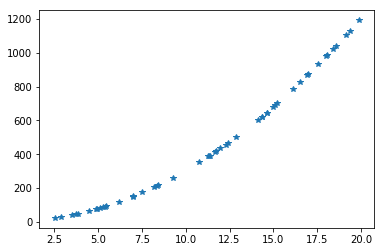

In [2]:
np.random.seed(101)

a = np.random.uniform(2, 20, 50)

label = []
label = ( 3*a*a + 5)

plt.plot(a, label, '*')

In [3]:
n = 1

batch_size = 5
W = tf.Variable(tf.zeros([n, 1]))
bias = tf.Variable(tf.zeros([1]))

x = tf.placeholder(tf.float32, [batch_size], name="x_tensor")
y = tf.placeholder(tf.float32, batch_size, name="y_tensor")

In [4]:
y_ = x*x*W + bias

In [5]:
cost = tf.reduce_sum(tf.square(y-y_))

In [6]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

In [7]:
init = tf.global_variables_initializer()

In [11]:
with tf.Session() as sess:
    sess.run(init)
    batches = 10000
    for _ in range(batches):
        rand_ind = np.random.randint(len(label), size=5)
        feed = {x:a[rand_ind], y:label[rand_ind]}
        sess.run(train, feed_dict=feed)
        if _ % 1000 == 0:
            print('Epoch ', _)
            print('cost ', sess.run(cost, feed_dict = feed))
        
    ma, mb = sess.run([W, bias])

Epoch  0
cost  1.50994e+06
Epoch  1000
cost  7.85497
Epoch  2000
cost  10.7236
Epoch  3000
cost  6.61357
Epoch  4000
cost  4.82837
Epoch  5000
cost  2.33609
Epoch  6000
cost  1.1054
Epoch  7000
cost  0.471392
Epoch  8000
cost  0.137596
Epoch  9000
cost  0.00357267


In [12]:
print(ma, mb)

[[ 3.0000267]] [ 4.99476385]


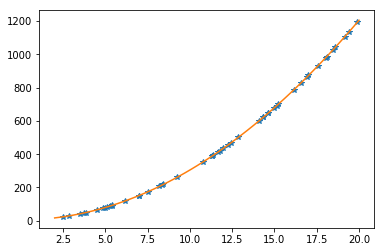

In [37]:
teste = np.linspace(2, 20.0, 50)
y_hat = np.array(ma[0])*teste*teste + mb
plt.plot(a, label, '*')
plt.plot(teste, y_hat)